amount_tsh <span style="color: orange;">(Numerical)</span>- Total static head (amount water available to waterpoint)

date_recorded <span style="color: blue;">(Date)</span>- The date the row was entered

funder <span style="color: green;">(Categorical)</span>- Who funded the well

gps_height <span style="color: orange;">(Numerical)</span>- Altitude of the well

installer <span style="color: green;">(Categorical)</span>- Organization that installed the well

longitude <span style="color: orange;">(Numerical)</span>- GPS coordinate

latitude <span style="color: orange;">(Numerical)</span>- GPS coordinate

wpt_name <span style="color: green;">(Categorical)</span>- Name of the waterpoint if there is one

num_private <span style="color: orange;">(Numerical)</span>

basin <span style="color: green;">(Categorical)</span>- Geographic water basin

subvillage <span style="color: green;">(Categorical)</span>- Geographic location

region <span style="color: green;">(Categorical)</span>- Geographic location

region_code <span style="color: green;">(Categorical)</span>- Geographic location (coded)

district_code <span style="color: green;">(Categorical)</span>- Geographic location (coded)

lga <span style="color: green;">(Categorical)</span>- Geographic location

ward <span style="color: green;">(Categorical)</span>- Geographic location

population <span style="color: orange;">(Numerical)</span>- Population around the well

public_meeting <span style="color: purple;">(Binary)</span>- True/False

recorded_by <span style="color: green;">(Categorical)</span>- Group entering this row of data

scheme_management <span style="color: green;">(Categorical)</span>- Who operates the waterpoint

scheme_name <span style="color: green;">(Categorical)</span>- Who operates the waterpoint

permit <span style="color: purple;">(Binary)</span>- If the waterpoint is permitted

construction_year <span style="color: blue;">(Date)</span>- Year the waterpoint was constructed

extraction_type <span style="color: green;">(Categorical)</span>- The kind of extraction the waterpoint uses

extraction_type_group <span style="color: green;">(Categorical)</span>- The kind of extraction the waterpoint uses

extraction_type_class <span style="color: green;">(Categorical)</span>- The kind of extraction the waterpoint uses

management <span style="color: green;">(Categorical)</span>- How the waterpoint is managed

management_group <span style="color: green;">(Categorical)</span>- How the waterpoint is managed

payment <span style="color: green;">(Categorical)</span>- What the water costs

payment_type <span style="color: green;">(Categorical)</span>- What the water costs

water_quality <span style="color: green;">(Categorical)</span>- The quality of the water

quality_group <span style="color: green;">(Categorical)</span>- The quality of the water

quantity <span style="color: green;">(Categorical)</span>- The quantity of water

quantity_group <span style="color: green;">(Categorical)</span>- The quantity of water

source <span style="color: green;">(Categorical)</span>- The source of the water

source_type <span style="color: green;">(Categorical)</span>- The source of the water

source_class <span style="color: green;">(Categorical)</span>- The source of the water

waterpoint_type <span style="color: green;">(Categorical)</span>- The kind of waterpoint

waterpoint_type_group <span style="color: green;">(Categorical)</span>- The kind of waterpoint

<span style="color: red;">Objective variable:</span> status_group <span style="color: green;">(Categorical)</span>

In [29]:
%pip install --upgrade lazypredict scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from scipy import cluster
from sklearn.feature_selection import SelectKBest, f_regression
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import os
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour  
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [16]:
root_repo = 'https://raw.githubusercontent.com/JaviARo/Datasets/refs/heads/main/WaterTable/'

train_labels_repo, train_values_repo, test_values_repo = root_repo + 'train_labels.csv', root_repo + 'train_values.csv', root_repo + 'test_values.csv'

train_labels = pd.read_csv(train_labels_repo, sep=',')
train_values = pd.read_csv(train_values_repo, sep=',')
test_values = pd.read_csv(test_values_repo, sep=',')

In [3]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.00,2013-02-04,Dmdd,1996,DMDD,35.29,-4.06,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.00,2013-02-04,Government Of Tanzania,1569,DWE,36.66,-3.31,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.00,2013-02-01,NaN,1567,NaN,34.77,-5.00,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.00,2013-01-22,Finn Water,267,FINN WATER,38.06,-9.42,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.00,2013-03-27,Bruder,1260,BRUDER,35.01,-10.95,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [3]:
for column in train_values.columns:
  num_valores_unicos = train_values[column].nunique()
  print(f'Unique values in column {column}: {num_valores_unicos}')

Unique values in column id: 59400
Unique values in column amount_tsh: 98
Unique values in column date_recorded: 356
Unique values in column funder: 1896
Unique values in column gps_height: 2428
Unique values in column installer: 2145
Unique values in column longitude: 57516
Unique values in column latitude: 57517
Unique values in column wpt_name: 37399
Unique values in column num_private: 65
Unique values in column basin: 9
Unique values in column subvillage: 19287
Unique values in column region: 21
Unique values in column region_code: 27
Unique values in column district_code: 20
Unique values in column lga: 125
Unique values in column ward: 2092
Unique values in column population: 1049
Unique values in column public_meeting: 2
Unique values in column recorded_by: 1
Unique values in column scheme_management: 11
Unique values in column scheme_name: 2695
Unique values in column permit: 2
Unique values in column construction_year: 55
Unique values in column extraction_type: 18
Unique valu

In [17]:
le = LabelEncoder()

pd.options.mode.copy_on_write = True

categorical_columns = [
  'funder',
	'installer',
	'wpt_name',
	'basin',
	'subvillage',
	'region',
	'region_code',
	'district_code',
	'lga',
	'ward',
	'recorded_by',
	'scheme_management',
	'scheme_name',
	'extraction_type',
	'extraction_type_group',
	'extraction_type_class',
	'management',
	'management_group',
	'payment',
	'payment_type',
	'water_quality',
	'quality_group',
	'quantity',
	'quantity_group',
	'source',
	'source_type',
	'source_class',
	'waterpoint_type',
	'waterpoint_type_group'
]

for column in categorical_columns: 
	train_values[column] = train_values[column].fillna('not_specified')

In [5]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [18]:
for column in categorical_columns: 
	train_values[column] = le.fit_transform(train_values[column])

In [19]:
binary_columns = ['public_meeting', 'permit']

for column in binary_columns: 
	train_values[column] = train_values[column].fillna('not_specified')

for column in binary_columns:
  train_values[column] = train_values[column].replace([False, 'not_specified', True],[0, 0.5, 1])

In [8]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,1368,1390,1518,34.94,-9.86,37398,0,...,0,6,2,1,1,8,6,0,1,1
1,8776,0.00,2013-03-06,469,1399,545,34.70,-2.15,37194,0,...,2,6,2,2,2,5,3,1,1,1
2,34310,25.00,2013-02-25,825,686,2048,37.46,-3.82,14572,0,...,5,6,2,1,1,0,1,1,2,1
3,67743,0.00,2013-01-28,1740,263,1852,38.49,-11.16,37284,0,...,2,6,2,0,0,3,0,0,2,1
4,19728,0.00,2011-07-13,20,0,119,31.13,-1.83,35528,0,...,2,6,2,3,3,5,3,1,1,1


In [20]:
train_values['date_recorded'] = train_values['date_recorded'].str.replace('-', '')

In [10]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,20110314,1368,1390,1518,34.94,-9.86,37398,0,...,0,6,2,1,1,8,6,0,1,1
1,8776,0.00,20130306,469,1399,545,34.70,-2.15,37194,0,...,2,6,2,2,2,5,3,1,1,1
2,34310,25.00,20130225,825,686,2048,37.46,-3.82,14572,0,...,5,6,2,1,1,0,1,1,2,1
3,67743,0.00,20130128,1740,263,1852,38.49,-11.16,37284,0,...,2,6,2,0,0,3,0,0,2,1
4,19728,0.00,20110713,20,0,119,31.13,-1.83,35528,0,...,2,6,2,3,3,5,3,1,1,1


In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
train_values_scaled = min_max_scaler.fit_transform(train_values)

column_names = list(train_values.columns.values)
train_values_scaled = pd.DataFrame(train_values_scaled, columns=column_names)
train_values_scaled.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.94,0.02,0.81,0.72,0.52,0.71,0.87,0.15,1.00,0.00,...,0.00,0.86,0.40,0.25,0.25,0.89,1.00,0.00,0.17,0.20
1,0.12,0.00,0.99,0.25,0.52,0.25,0.86,0.82,0.99,0.00,...,0.33,0.86,0.40,0.50,0.50,0.56,0.50,0.50,0.17,0.20
2,0.46,0.00,0.99,0.44,0.27,0.95,0.93,0.67,0.39,0.00,...,0.83,0.86,0.40,0.25,0.25,0.00,0.17,0.50,0.33,0.20
3,0.91,0.00,0.99,0.92,0.12,0.86,0.95,0.04,1.00,0.00,...,0.33,0.86,0.40,0.00,0.00,0.33,0.00,0.00,0.33,0.20
4,0.27,0.00,0.81,0.01,0.03,0.06,0.77,0.84,0.95,0.00,...,0.33,0.86,0.40,0.75,0.75,0.56,0.50,0.50,0.17,0.20


In [ ]:
# train_values_scaled = train_values

In [22]:
train_values_scaled['status_group'] = train_labels['status_group']

In [34]:
train_values_scaled.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0.94,0.02,0.81,0.72,0.52,0.71,0.87,0.15,1.00,0.00,...,0.86,0.40,0.25,0.25,0.89,1.00,0.00,0.17,0.20,functional
1,0.12,0.00,0.99,0.25,0.52,0.25,0.86,0.82,0.99,0.00,...,0.86,0.40,0.50,0.50,0.56,0.50,0.50,0.17,0.20,functional
2,0.46,0.00,0.99,0.44,0.27,0.95,0.93,0.67,0.39,0.00,...,0.86,0.40,0.25,0.25,0.00,0.17,0.50,0.33,0.20,functional
3,0.91,0.00,0.99,0.92,0.12,0.86,0.95,0.04,1.00,0.00,...,0.86,0.40,0.00,0.00,0.33,0.00,0.00,0.33,0.20,non functional
4,0.27,0.00,0.81,0.01,0.03,0.06,0.77,0.84,0.95,0.00,...,0.86,0.40,0.75,0.75,0.56,0.50,0.50,0.17,0.20,functional


In [37]:
X = train_values_scaled.drop(columns=['status_group'], axis=1)
y = train_values_scaled['status_group']
y = y.replace(['non functional', 'functional needs repair', 'functional'],[1, 2, 3])
# cnn = CondensedNearestNeighbour(random_state=42)  
# X, y = cnn.fit_resample(X, y) 
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X, y = cc.fit_resample(X, y)
# X, y = SMOTE().fit_resample(X, y)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train) # 0.25 x 0.8 = 0.2

In [34]:
X_train.shape

(7770, 40)

In [35]:
y_train.shape

(7770,)

In [13]:
def PlotMatrizCorrelacion(corr_mat_data):
	sns.set_theme()
	data_mask = np.triu(np.ones_like(corr_mat_data, dtype = bool)) # Recorta la gráfica

	cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 5, center = 'light', as_cmap = True)

	plt.figure(figsize = (23, 15))
	# sns.heatmap(X.corr(), square=True, annot=True)
	sns.heatmap(corr_mat_data, annot = True, cmap = cmap, fmt = '.2f', center = 0,
							annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Features (in Competition Dataset)')

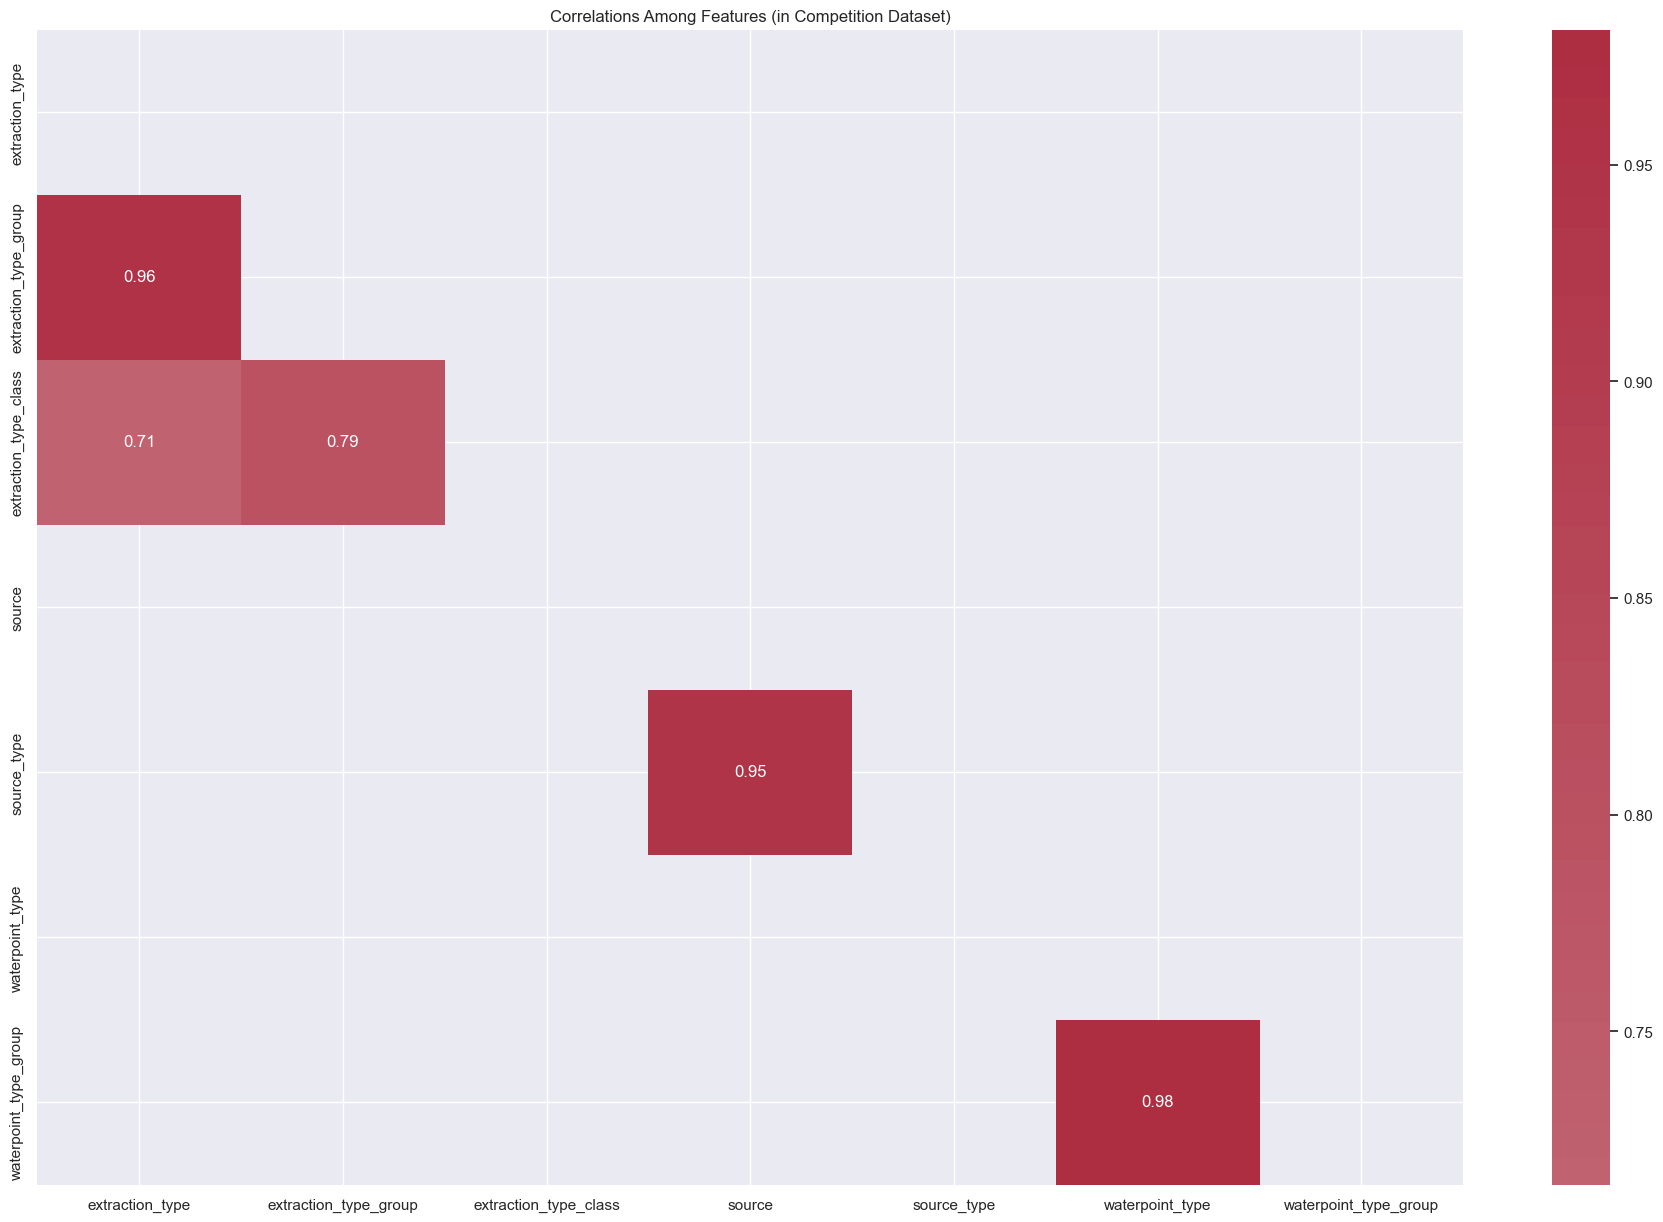

In [14]:
correlation_matrix = X.corr()

# Correlaciones mayores a 0.7
threshold = 0.7
high_correlations = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]

high_correlations.dropna(axis=0, how='all', inplace=True)  # Elimina las filas que no tienen datos
high_correlations.dropna(axis=1, how='all', inplace=True)  # Elimina las columnas que no tienen datos

PlotMatrizCorrelacion(high_correlations)

In [15]:
def Dendrogram(X, threshold, title):
	X_T = X.T

	dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
	D = dist.pairwise(X_T)
	avD = np.average(D)
	print("Distancia Media\t {:6.2f}".format(avD))

	plt.figure(figsize=(6, 10))
	plt.title(title)
	plt.xlabel('Columnas')
	plt.ylabel('Distancia')

	clusters = cluster.hierarchy.linkage(D, method='complete')
	cluster.hierarchy.dendrogram(clusters, color_threshold=threshold, labels=X.columns.to_list(), orientation='right')
	plt.show()

Distancia Media	 147.21


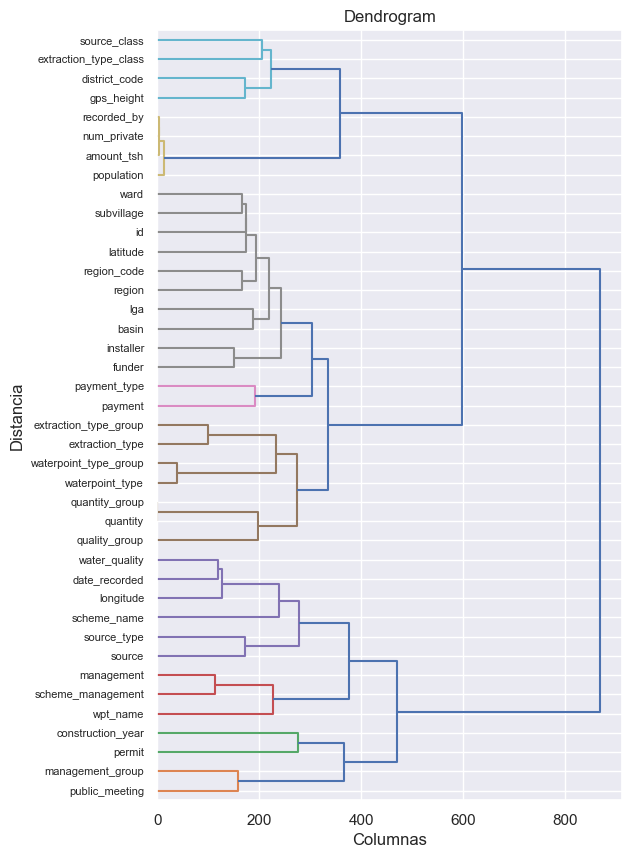

In [19]:
Dendrogram(X, 300, 'Dendrogram')

In [17]:
def ApplySelectKBest(X_train, X_val, y_train, k):
	selector = SelectKBest(f_regression, k=k)

	selector.fit_transform(X_train, y_train)
	selector.transform(X_val)

	print(f"Mejores {k} columnas = [")
	for col in selector.get_feature_names_out():
		print(f"  \'{col}\'")
	print("]\n")

In [18]:
ApplySelectKBest(X_train, X_val, y_train, 1)
ApplySelectKBest(X_train, X_val, y_train, 3)
ApplySelectKBest(X_train, X_val, y_train, 5)
# ApplySelectKBest(X_train, X_val, y_train, 10)
# ApplySelectKBest(X_train, X_val, y_train, 11)
# ApplySelectKBest(X_train, X_val, y_train, 14)
# ApplySelectKBest(X_train, X_val, y_train, 15)
# ApplySelectKBest(X_train, X_val, y_train, 17)
# ApplySelectKBest(X_train, X_val, y_train, 19)
# ApplySelectKBest(X_train, X_val, y_train, 22)
# ApplySelectKBest(X_train, X_val, y_train, 24)

Mejores 1 columnas = [
  'waterpoint_type'
]

Mejores 3 columnas = [
  'extraction_type_class'
  'waterpoint_type'
  'waterpoint_type_group'
]

Mejores 5 columnas = [
  'extraction_type_class'
  'quality_group'
  'quantity_group'
  'waterpoint_type'
  'waterpoint_type_group'
]



- Group 1: 'region'
- Group 2: 'management'
- Group 3: 'waterpoint_type_group', 'quality_group', 'waterpoint_type'
- Group 4: 'extraction_type_class', 'extraction_type'
- Group 5: 'quantity_group', 'gps_height', 'quantity'
- Group 6: 'payment'
- Group 7: 'amount_tsh'
- Group 8: 'construction_year'
- Group 9: 'public_meeting'
- Group 10: 'scheme_name'
- Group 11: 'source'

In [18]:
ApplySelectKBest(X_train, X_val, y_train, 1)
ApplySelectKBest(X_train, X_val, y_train, 3)
ApplySelectKBest(X_train, X_val, y_train, 10)
ApplySelectKBest(X_train, X_val, y_train, 17)

Mejores 1 columnas = [
  'waterpoint_type'
]

Mejores 3 columnas = [
  'extraction_type_class'
  'waterpoint_type'
  'waterpoint_type_group'
]

Mejores 10 columnas = [
  'gps_height'
  'extraction_type'
  'extraction_type_group'
  'extraction_type_class'
  'quality_group'
  'quantity'
  'quantity_group'
  'source'
  'waterpoint_type'
  'waterpoint_type_group'
]

Mejores 17 columnas = [
  'gps_height'
  'region'
  'region_code'
  'lga'
  'public_meeting'
  'extraction_type'
  'extraction_type_group'
  'extraction_type_class'
  'management'
  'payment'
  'quality_group'
  'quantity'
  'quantity_group'
  'source'
  'source_type'
  'waterpoint_type'
  'waterpoint_type_group'
]



- Group 1: 'waterpoint_type_group'
- Group 2: 'extraction_type_class'
- Group 3: 'amount_tsh'
- Group 4: 'source'

In [40]:
# X = X[[
# 	'region',
# 	'management',
# 	'waterpoint_type_group',
#   'quality_group', 
#   'waterpoint_type', 
#   'extraction_type',
# 	'extraction_type_class',
# 	'quantity_group', 
#   'gps_height', 
#   'quantity',
# 	'payment',
# 	'amount_tsh',
# 	'construction_year',
# 	'public_meeting',
#  	'scheme_name',
#  	'source'
# ]]

# X = X[[
# 	'extraction_type_class',
#   'quality_group',
#   'quantity_group',
#   'waterpoint_type',
#   'waterpoint_type_group'
# ]]

# X = train_values_scaled.drop(columns=['waterpoint_type', 'extraction_type', 'extraction_type_group', 'wpt_name', 'num_private', 'status_group'], axis=1)

# X = X[[
# 	'waterpoint_type_group',
# 	'extraction_type_class',
# 	'amount_tsh',
# 	'source'
# ]]

# X = X[[
# 	'waterpoint_type',
# 	'extraction_type_class',
# 	'amount_tsh',
# 	'source'
# ]]
# X = X[[
# 	'extraction_type_class',
#   'quality_group',
#   'quantity_group',
#   'waterpoint_type'
# ]]

X = X.drop(columns=['wpt_name', 'num_private'], axis=1)

# y = train_values_scaled['status_group']

# y = y.replace(['non functional', 'functional needs repair', 'functional'],[1, 2, 3])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train) # 0.25 x 0.8 = 0.2

In [16]:
os.mkdir('train_values_transformed')
X.to_csv('train_values_transformed/X.csv')
y.to_csv('train_values_transformed/y.csv')

In [3]:
X = pd.read_csv('train_values_transformed/X.csv', sep=',')
y = pd.read_csv('train_values_transformed/y.csv', sep=',')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [18]:
y_train.head()

,Unnamed: 0,status_group
3478,3478,1
19474,19474,3
16184,16184,1
13342,13342,1
34350,34350,3


In [24]:
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type_group,status_group
3478,0.97,0.00,0.99,0.21,0.09,0.24,0.99,0.07,0.01,0.00,...,0.33,0.86,0.40,0.00,0.00,0.33,0.00,0.00,0.20,non functional
19474,0.75,0.00,0.81,1.00,0.03,0.99,0.83,0.22,0.48,0.00,...,0.33,0.86,0.40,0.25,0.25,0.89,1.00,0.00,0.20,functional
16184,0.16,0.00,0.91,0.24,0.03,0.27,0.00,1.00,0.41,0.00,...,0.33,0.86,0.40,0.25,0.25,0.33,0.00,0.00,0.20,non functional
13342,0.26,0.00,0.81,0.86,0.03,0.77,0.80,0.79,0.87,0.00,...,0.33,0.86,0.40,0.25,0.25,0.78,0.83,0.00,0.60,non functional
34350,0.31,0.00,0.81,0.24,0.03,0.12,0.88,0.53,0.09,0.00,...,0.83,0.86,0.40,0.25,0.25,0.33,0.00,0.00,0.20,functional


In [41]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 87%|████████▋ | 27/31 [00:21<00:03,  1.05it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8423
[LightGBM] [Info] Number of data points in the train set: 7770, number of used features: 37
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


100%|██████████| 31/31 [00:21<00:00,  1.44it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.84               0.84    None      0.84   
RandomForestClassifier             0.74               0.74    None      0.74   
ExtraTreesClassifier               0.72               0.72    None      0.72   
BaggingClassifier                  0.72               0.72    None      0.72   
AdaBoostClassifier                 0.66               0.66    None      0.67   
DecisionTreeClassifier             0.66               0.66    None      0.66   
NuSVC                              0.65               0.65    None      0.65   
SVC                                0.65               0.65    None      0.65   
ExtraTreeClassifier                0.62               0.62    None      0.62   
LabelSpreading                     0.58               0.58    None      0.58   
LabelPropagation                   0.58 

In [50]:
clf = BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)

In [ ]:
y_val.shape

(11880,)

In [38]:
[y_val]

[50088                 functional
 14032             non functional
 45629                 functional
 55020                 functional
 6407                  functional
                   ...           
 38013                 functional
 43435                 functional
 46588             non functional
 43957    functional needs repair
 22924                 functional
 Name: status_group, Length: 11880, dtype: object]

In [40]:
y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.739983164983165


In [54]:
clf = RandomForestClassifier(max_depth=32, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.8063973063973064
